## CorrSearch: example

To run the following example code, please download an [example dataset](http://www.hci.iis.u-tokyo.ac.jp/datasets/data/EgoSurf/example.tar.gz) first. This dataset has the following directory structure.

```
example
|-- 0 (observer video)
|   |-- ppm (image sequence)
|   `-- sv (supervoxel hierarchy generated by ```gbh_stream```)
|       |-- 00
|       |-- 04
|       |-- 08
|       `-- 12
`-- 1 (target video)
    `-- ppm (image sequence)
```

### Running on IPythonNotebook

In [1]:
sys.path.append('../src/')
import CorrSearchSV as CSSV # main module
rootdir = '<set your path to the example directory>'
# Input data
tardir = rootdir + '/example/1/ppm' # rgb data, .ppm format
obsdir = rootdir + '/example/0/ppm' # rgb data, .ppm format
svdir = CSSV.glob.glob(rootdir + '/example/0/sv/*') # set of directories containing supervoxel results, .ppm format

# Params for CorrSearch are stored in .json form. You can freely change them as follows.
params = CSSV.json.load(open('params.json'))

# Classifier and feature scaler learned from CMU dataset.
clsf, ss = CSSV.np.load('model.npy')

# Running CorrSearch
C = CSSV.CSPCA(**params)
%time localize_result = C.localize_target(tardir, obsdir, svdir, clsf, ss)

seq #1 / 4
Calculating motion... done.
Matching motion... scale #1/4... scale #2/4... scale #3/4... scale #4/4... done.
seq #2 / 4
Calculating motion... done.
Matching motion... scale #1/4... scale #2/4... scale #3/4... scale #4/4... done.
seq #3 / 4
Calculating motion... done.
Matching motion... scale #1/4... scale #2/4... scale #3/4... scale #4/4... done.
seq #4 / 4
Calculating motion... done.
Matching motion... scale #1/4... scale #2/4... scale #3/4... scale #4/4... done.
CPU times: user 23.9 s, sys: 823 ms, total: 24.7 s
Wall time: 16.9 s


### Running on a terminal

In [ ]:
%%bash
rootdir='<set your path to the example directory>'
python ../src/CorrSearchSV.py -p params.json -t ${rootdir}/example/1/ppm -o ${rootdir}/example/0/ppm -s ${rootdir}/example/0/sv -m model.npy -r localize.npy


### Visualization

(-0.5, 159.5, 89.5, -0.5)

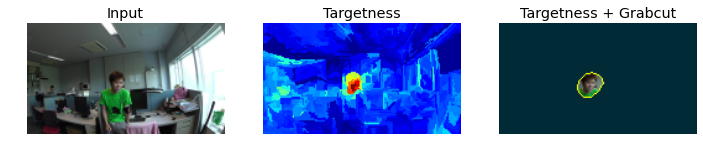

In [5]:
import matplotlib.pyplot as plt # required for visualization
%matplotlib inline

frame_id = 0
plt.figure(figsize=[12, 4])
plt.subplot(1, 3, 1)
im = CSSV.cv2.resize(CSSV.cv2.imread(CSSV.glob.glob('%s/*.ppm' % obsdir)[frame_id]), (160, 90))[:, :, ::-1]
plt.imshow(im)
plt.title('Input')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(localize_result[:, :, frame_id])
plt.title('Targetness')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(CSSV.grabcut(im, localize_result[:, :, frame_id])[0])
plt.title('Targetness + Grabcut')
plt.axis('off')

### Changing parameters

In [ ]:
params['gstep'] = 30 # Changing the framerate for localization results (results will be genearted at every 30 frame)
params['step'] = 2 # Changing the temporal stride to compute motions (step=2 makes 2x faster)
params['interval'] = 60 # Changing the temporal interval used for calculating correlations in a streaming fashion
params['imgsize'] = [320, 180] # Changing an input image size to compute motions
params['mode'] = 'abs' # Using an amplitude-basd correlation instead of a subspace cross correlation (mode='pca') when running on a terminal
# (equivalent to run CSSV.CSABS in ipython notebook)
params['ext'] = '.jpg' # Changing the extension of input data
params['nframes'] = 60 # Chaniging the number of frames to be processed

### Computing supervoxel hierarchies


For observer videos, the proposed method needs to compute a hierarchy of supervoxels as target candidates. We obtained this hierarchy by ```gbh_stream``` in [LIBSVX](http://www.cse.buffalo.edu/~jcorso/r/supervoxels/). Please follow the  instructions below to use gbh_stream in your environment.

1. Download [LIBSVX](http://www.cse.buffalo.edu/~jcorso/r/supervoxels/). We are using LIBSVX Version 3.0.

2. Execute the following command in ```libsvx.v3.0/``` directory to apply a patch.
```
patch -ud gbh_stream < misc/gbh_skip_layers.patch
```
In this patch, we slightly modified the original code to output supervoxels at selected layers (e.g., 0, 4, 8, 12th layers). 

3. Copy misc/run_gbh.sh to ```gbh_stream``` and execute it. Do not forget to specify a directory to work with in the file.